In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries
import matplotlib.pyplot as plt

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
import pandas as pd
df = pd.read_csv('sp500.csv',header=None)
df

,0
0,1455.219971
1,1399.420044
2,1402.109985
3,1403.449951
4,1441.469971
5,1457.599976
6,1438.560059
7,1432.250000
8,1449.680054
9,1465.150024


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3709, 50, 1), (3709,), (412, 50, 1), (412,))

In [4]:
#Step 2 Build Model
#三个LSTM层，1个全连接层
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(
    input_dim=50,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.024616241455078125


In [5]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=5,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/5
3523/3523 [==============================] - 9s 3ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 2/5
3523/3523 [==============================] - 4s 1ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/5
3523/3523 [==============================] - 4s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/5
3523/3523 [==============================] - 4s 1ms/step - loss: 9.2474e-04 - val_loss: 0.0010
Epoch 5/5
3523/3523 [==============================] - 4s 1ms/step - loss: 8.6247e-04 - val_loss: 8.0567e-04


### 长短线两点预测

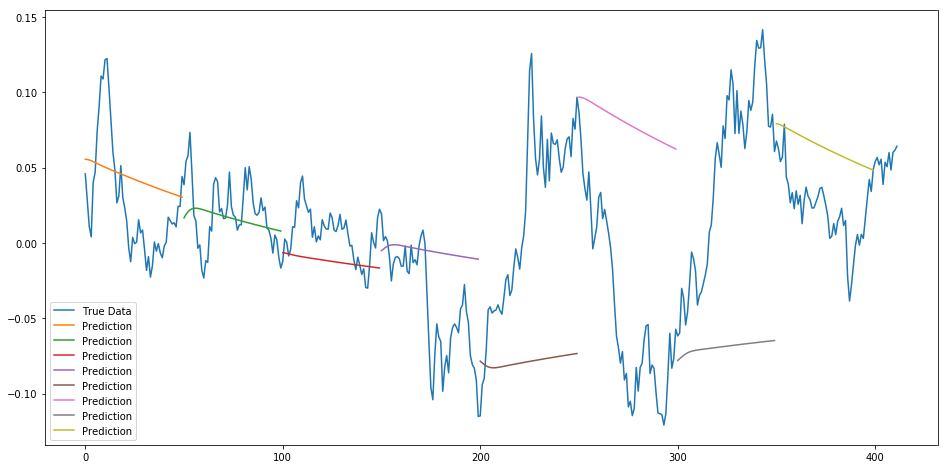

In [6]:
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
plt.rcParams['figure.figsize'] = 16,8
lstm.plot_results_multiple(predictions, y_test, 50)

### 数据点趋势预测

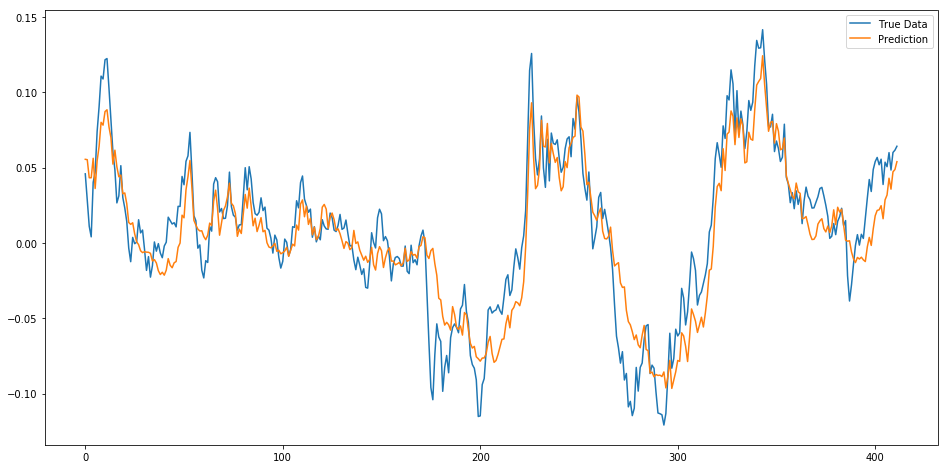

In [7]:
point_predictions = lstm.predict_point_by_point(model, X_test)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(y_test, label='True Data')
ax.plot(point_predictions, label='Prediction')
ax.legend()